In [1]:
import requests as req

In [2]:
url="https://en.wikipedia.org/wiki/Rare-earth_element"

In [3]:
response=req.get(url)

In [4]:
response.status_code

200

In [5]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Rare-earth element - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1

In [6]:
from selectolax.parser import HTMLParser

In [7]:
tree=HTMLParser(response.text)

In [8]:
type(tree)

selectolax.parser.HTMLParser

In [11]:
tree.css("p")[0]

<Node p>

In [13]:
from random import choice
random_node=choice(tree.css("img"))

In [14]:
random_node

<Node img>

In [16]:
random_node.attributes

{'src': 'https://wikimedia.org/api/rest_v1/media/math/render/svg/554398d40752a3f4e2d1cc67f671c929837d663e',
 'class': 'mwe-math-fallback-image-inline mw-invert skin-invert',
 'aria-hidden': 'true',
 'style': 'vertical-align: -0.838ex; width:9.08ex; height:2.843ex;',
 'alt': '{\\displaystyle {[{\\text{REE}}_{i}]_{\\text{ref}}}}'}

In [18]:
random_node.text()

''

In [23]:
tree.css("p")[1].text()

'The rare-earth elements (REE), also called the rare-earth metals or rare earths, and sometimes the lanthanides or lanthanoids (although scandium and yttrium, which do not belong to this series, are usually included as rare earths),[1] are a set of 17 nearly indistinguishable lustrous silvery-white soft heavy metals. Compounds containing rare earths have diverse applications in electrical and electronic components, lasers, glass, magnetic materials, and industrial processes.\n'

In [24]:
tree.css("p")[1].text(deep=False)

'The  (), also called the  or , and sometimes the  or lanthanoids (although  and , which do not belong to this series, are usually included as rare earths), are a set of 17 nearly indistinguishable lustrous silvery-white soft . Compounds containing rare earths have diverse applications in electrical and electronic components, lasers, glass, magnetic materials, and industrial processes.\n'

In [26]:
tree.css("p")[1].html

'<p>The <b>rare-earth elements</b> (<b>REE</b>), also called the <b>rare-earth metals</b> or <b>rare earths</b>, and sometimes the <a href="/wiki/Lanthanide" title="Lanthanide">lanthanides</a> or lanthanoids (although <a href="/wiki/Scandium" title="Scandium">scandium</a> and <a href="/wiki/Yttrium" title="Yttrium">yttrium</a>, which do not belong to this series, are usually included as rare earths),<sup id="cite_ref-1" class="reference"><a href="#cite_note-1"><span class="cite-bracket">[</span>1<span class="cite-bracket">]</span></a></sup> are a set of 17 nearly indistinguishable lustrous silvery-white soft <a href="/wiki/Heavy_metals" title="Heavy metals">heavy metals</a>. Compounds containing rare earths have diverse applications in electrical and electronic components, lasers, glass, magnetic materials, and industrial processes.\n</p>'

# Css Combinators

In [27]:
# > by type ->p
# by class -> .some_class
# by id -> #some_id
# by attribute->[some_attribute]

In [30]:
edit_anchors=tree.css("h2 a")
edit_anchors

[]

In [29]:
[n.attributes["href"] for n in edit_anchors]

[]

In [31]:
tree.css("h2 > a")  # direct children 

[]

In [34]:
tree.css("h2 > span >a")

True

# sibiling combinators

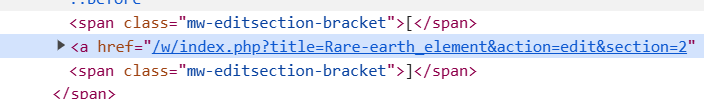

In [40]:
tree.css(".mw-editsection-bracket + a")[0:3]  # adjacent sibiling clss + anchor

[<Node a>, <Node a>, <Node a>]

In [41]:
all=tree.css(".mw-editsection-bracket + a")

In [43]:
len(all)

35

In [48]:
[e.parent.parent.tag for e in all][0:10]

['div', 'div', 'div', 'div', 'div', 'div', 'div', 'div', 'div', 'div']

In [51]:
# general sibling combinator
all=tree.css(".mw-editsection-bracket ~ a")  # all sibiling not only adjacent sibiling

In [52]:
len(all)

35

# Selector Types

In [53]:
len(tree.css("span"))

2169

In [54]:
len(tree.css(".mw-editsection-bracket"))

70

In [55]:
len(tree.css("#firstHeading"))

1

In [56]:
#compound

In [57]:
tree.css("p[class]")

[<Node p>]

In [58]:
tree.css("p.some_class")

[]

In [59]:
#complex

In [60]:
tree.css("a > img[src*='upload.wikimedia.org']")

[<Node img>,
 <Node img>,
 <Node img>,
 <Node img>,
 <Node img>,
 <Node img>,
 <Node img>,
 <Node img>,
 <Node img>]

In [61]:
#lists

In [63]:
len(tree.css("a > img[src*='upload.wikimedia.org'] , p"))

119

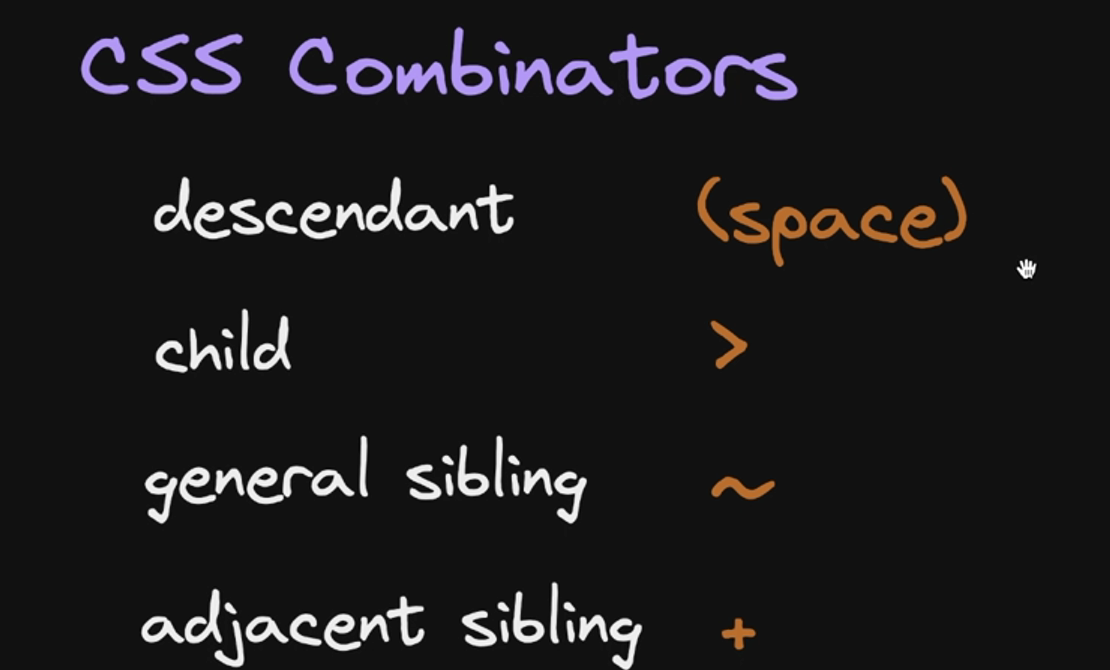

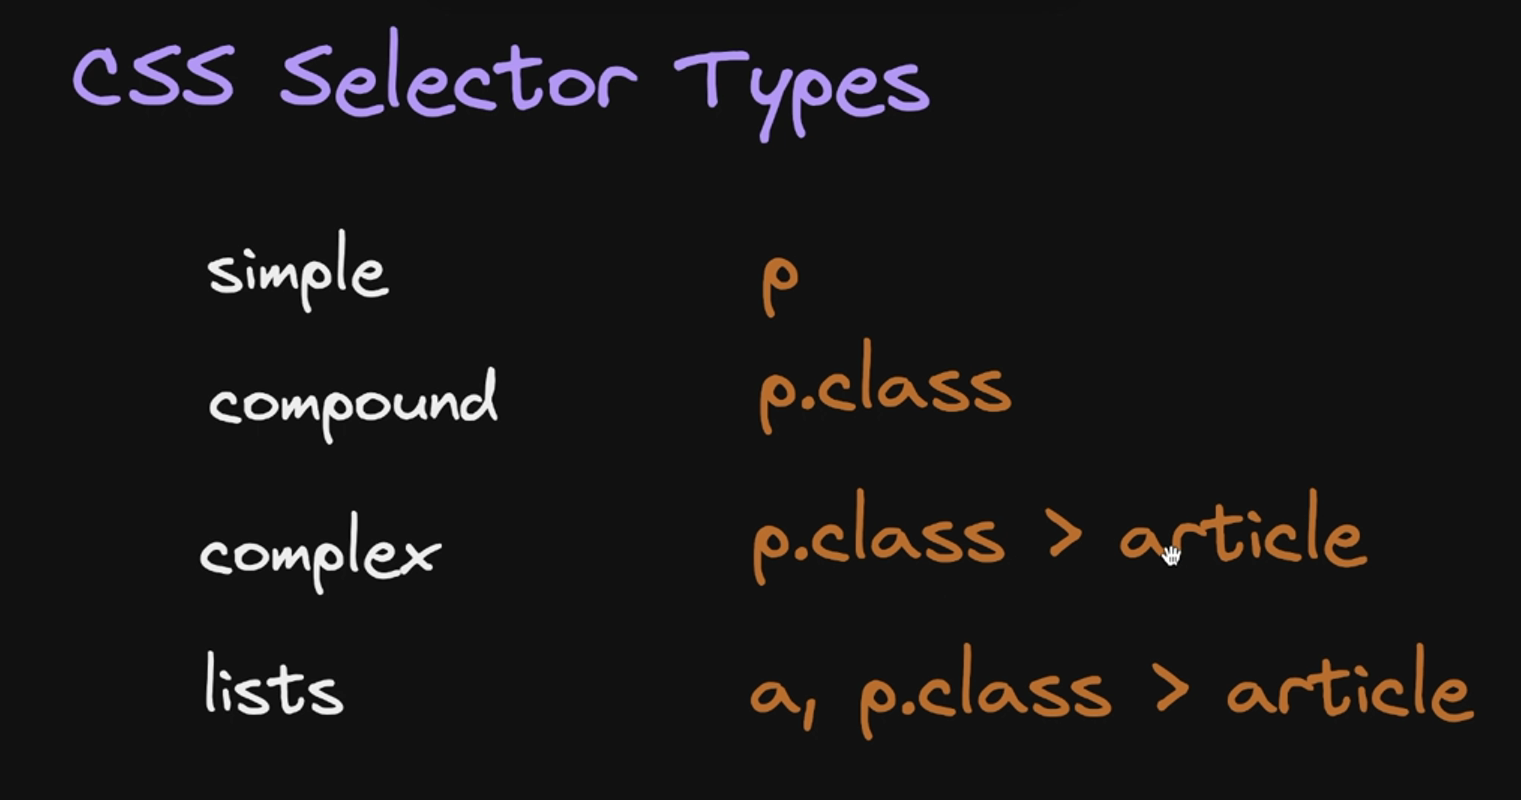